In [3]:
import numpy as np 

from scipy.integrate import solve_ivp

from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.style.use('seaborn')

from functools import partial 
from tqdm import tqdm 
 
tqdm = partial(tqdm, position=0, leave=True)


In [4]:
def f_rot(x, y): 
    return (y**3 + x**2*y - y - x) / (x*y**2+x**3+y-x)

def f_rot_edelman(x, y): 
     return (y + x * (x**2 + y**2)) / (x - y * (x**2 + y**2))

In [5]:
x, y = np.linspace(-2., 2., 35), np.linspace(-2., 2., 35) 
X, Y = np.meshgrid(x, y) 

#dYdX = f_rot(X, Y) 
dYdX = f_rot_edelman(X, Y)
U = (1. / (1. + dYdX**2) ** 0.5) * np.ones(Y.shape) 
V = (1. / (1. + dYdX**2) ** 0.5) * dYdX

/tmp/ipykernel_55261/1332968243.py:5: RuntimeWarning: invalid value encountered in divide
  return (y + x * (x**2 + y**2)) / (x - y * (x**2 + y**2))


In [9]:
def single_solve(y0): 
    return solve_ivp(f_rot, t_span=[-2, 1], y0=[y0])

def single_solve_edelman(y0): 
    return solve_ivp(f_rot_edelman, t_span=[-2, 1], y0=[y0])

In [7]:
res = single_solve(-1)

resx, resy = res.t, res.y.flatten() 

Text(0, 0.5, 'y')

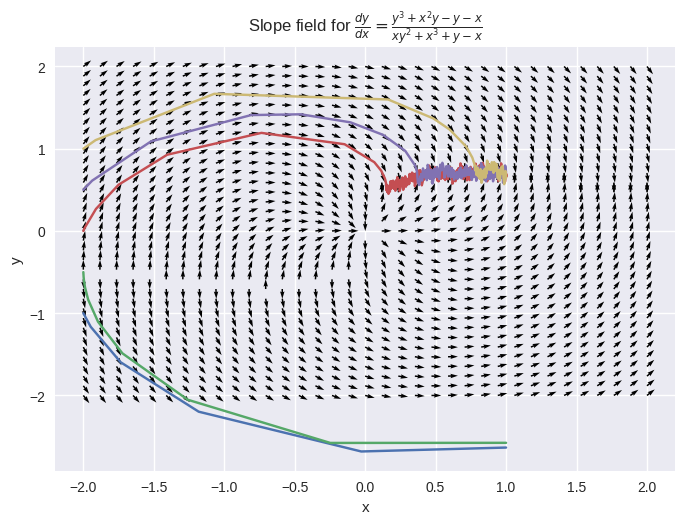

In [11]:
plt.quiver(X, Y, U, V, cmap='coolwarm')

y0s = np.linspace(-1., 1., 5)

for y0 in y0s: 
    res = single_solve_edelman(y0)
    #res = single_solve(y0) 
    resx, resy = res.t, res.y.flatten() 

    plt.plot(resx, resy)

plt.title(r"Slope field for $\frac{dy}{dx} = \frac{y^3 + x^2y - y- x}{xy^2 + x^3 + y - x}  $")
plt.xlabel("x")
plt.ylabel('y')

In [28]:
def single_solve(y0): 
    return solve_ivp(f_rot, t_span=[-2, 1.], y0=[y0], t_eval=np.linspace(-2., 1., 20))

100%|██████████| 10/10 [00:00<00:00, 521.73it/s]


Text(0, 0.5, 'y')

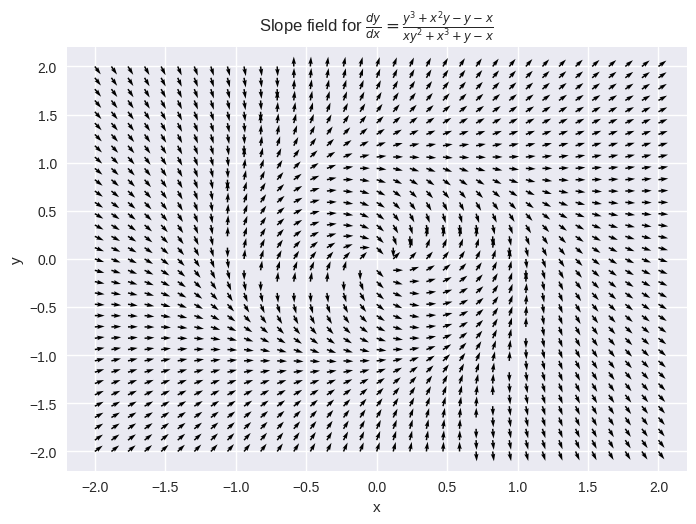

In [38]:
plt.quiver(X, Y, U, V, cmap='coolwarm')

Nsolve = 10

y0s = np.linspace(-2., 2., Nsolve)
#print(f"y0s = {y0s}")

rez = np.zeros([Nsolve, 20])
i = 0
for idx, y0 in enumerate(tqdm(y0s)):
    #print(f"at {idx+1}")
    res = single_solve(y0) 
    resx, resy = res.t, res.y.flatten() 
    #print(resy.shape)
    if resy.shape[0] == 20: 
        rez[i] = resy
    i += 1
    #plt.plot(resx,resy)

np.savez("ode10x20.npz", rez)

plt.title(r"Slope field for $\frac{dy}{dx} = \frac{y^3 + x^2y - y- x}{xy^2 + x^3 + y - x}  $")
plt.xlabel("x")
plt.ylabel('y')